# Deep Learning for Audio

## STFT 

In [3]:
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np

### Read audio file

In [3]:
file = 'data/train/Actions - One Minute Smile.stem.mp4'

In [7]:
signal, sr = librosa.load(file) #Sample rate-- 22050 * length of file

C:\Users\cezea\Anaconda3\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Text(0, 0.5, 'Amplitude')

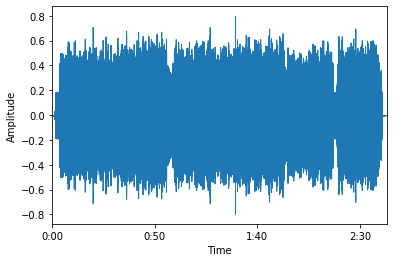

In [9]:
librosa.display.waveplot(signal, sr=sr)
plt.xlabel('Time')
plt.ylabel('Amplitude')

### Perform STFT Transform

Fast Fourier Transform

In [11]:
fft = np.fft.fft(signal)

magnitude = np.absolute(fft)  # get the absolute values of complex values in fft

freq = np.linspace(start= 0, stop= sr, num= len(magnitude)) # get the frequeny

Text(0, 0.5, 'Amplitude')

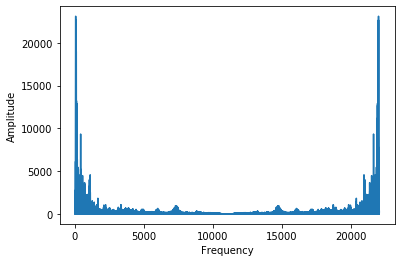

In [12]:
plt.plot(freq, magnitude)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

We only need the first half. Nyquist theorem explains it but not really needed in this scope.

Text(0, 0.5, 'Amplitude')

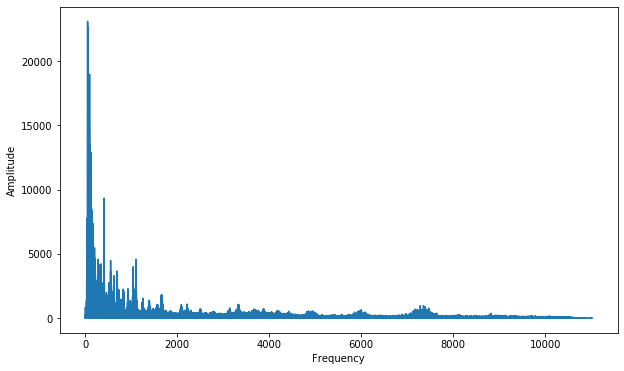

In [16]:
left_freq = freq[:int(len(freq) / 2)]
left_magnitude = magnitude[:int(len(magnitude) / 2)]
plt.figure(figsize=(10, 6))
plt.plot(left_freq, left_magnitude)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

STFT

In [17]:
n_fft = 2048 # number of samples per fft i.e the window where fft
hop_length = 512 # tells us by how much we're sliding thru window

stft = librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)

In [18]:
spectogram = np.abs(stft)

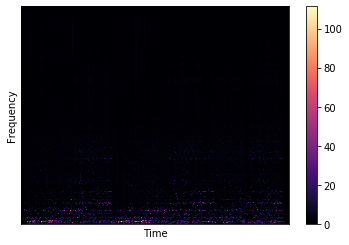

In [26]:
librosa.display.specshow(spectogram, sr= sr, hop_length= hop_length)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar();

We need to calculate the log of the spectogram to enable us visualize as the above is linear.

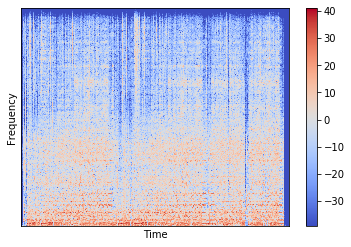

In [27]:
log_spectogram =librosa.amplitude_to_db(spectogram) # amplitude to decibel

librosa.display.specshow(log_spectogram, sr= sr, hop_length= hop_length)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar();

### Extract MFCCs

Mel-frequency cepstral coefficients (MFCCs)

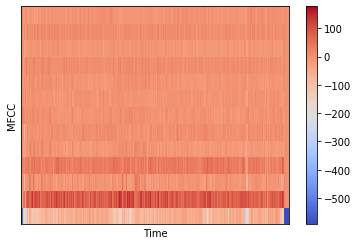

In [29]:
mfccs = librosa.feature.mfcc(signal, n_fft=n_fft,
                             hop_length= hop_length,
                             n_mfcc=13)


librosa.display.specshow(mfccs, sr= sr, hop_length= hop_length)
plt.xlabel('Time')
plt.ylabel('MFCC')
plt.colorbar()